GMMs - SVM . Accuracy -82%

In [ ]:
import numpy as np
import os
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA


from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, classification_report
from sklearn.mixture import GaussianMixture
import librosa

# Configuration
NUM_INSTRUMENTS = 10
NUM_GAUSSIANS = 5
NUM_COMPONENTS = 3  # Number of states in HMM (if using HMM)
MFCC_FEATURES = 13
AUDIO_PATH = "C:/Users/Natasha/Desktop/research_module/Musical_Instrument_Data"



# Step 1: Feature Extraction
def extract_features(file_path):
    y, sr = librosa.load(file_path, sr=None)
    mfccs = librosa.feature.mfcc(y=y, sr=sr, n_mfcc=MFCC_FEATURES)
    return np.mean(mfccs, axis=1)

# Iterating through each instrument folder
instrument_features = []
instrument_labels = []

for idx, instrument_folder in enumerate(os.listdir(AUDIO_PATH)):
    folder_path = os.path.join(AUDIO_PATH, instrument_folder)
    if os.path.isdir(folder_path):
        for file_name in os.listdir(folder_path):
            file_path = os.path.join(folder_path, file_name)
            try:
                features = extract_features(file_path)
                instrument_features.append(features)
                instrument_labels.append(idx)
            except Exception as e:
                print(f"Error processing {file_path}: {e}")


# Step 2: Scaling Features
scaler = StandardScaler()
scaled_features = scaler.fit_transform(instrument_features)


# Step 3: Dimensionality Reduction (PCA)
pca = PCA(n_components=10)
pca_features = pca.fit_transform(scaled_features)


# Step 4: Train GMM for each instrument
models = []
for label in range(NUM_INSTRUMENTS):
    gmm = GaussianMixture(n_components=NUM_GAUSSIANS, covariance_type='diag', reg_covar=1e-6)
    label_features = [pca_features[i] for i in range(len(pca_features)) if instrument_labels[i] == label]
    gmm.fit(label_features)
    models.append(gmm)


# Step 5: Compute log-likelihoods for SVM training
log_likelihood_features = []
for features in pca_features:
    log_likelihood = [gmm.score([features]) for gmm in models]
    log_likelihood_features.append(log_likelihood)


# Step 6: Train/Test Split
X_train, X_test, y_train, y_test = train_test_split(log_likelihood_features, instrument_labels, test_size=0.3, random_state=42)


# Step 7: Train SVM Classifier
svm = SVC(kernel='linear', C=1.0)
svm.fit(X_train, y_train)


# Step 8: Evaluate Model
predictions = svm.predict(X_test)
accuracy = accuracy_score(y_test, predictions)
print(f"Accuracy: {accuracy:.2f}")
print(classification_report(y_test, predictions))


In [ ]:
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

# Assuming you have predictions and y_test already defined
cm = confusion_matrix(y_test, predictions)

# Create a figure for the confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.title("Confusion Matrix")
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.show()


In [ ]:
# Convert lists to NumPy arrays if not already
pca_features = np.array(pca_features)
instrument_labels = np.array(instrument_labels)

plt.figure(figsize=(8, 6))
for label in np.unique(instrument_labels):
    # Plot only the samples belonging to a particular label
    label_mask = (instrument_labels == label)
    plt.scatter(
        pca_features[label_mask, 0],
        pca_features[label_mask, 1],
        label=f"Class {label}"
    )

plt.title("PCA Overlap Visualization")
plt.xlabel("Principal Component 1")
plt.ylabel("Principal Component 2")
plt.legend()
plt.show()


In [ ]:
import numpy as np
from sklearn.metrics import confusion_matrix

conf_matrix1 = confusion_matrix(y_test, predictions)  # Model 1's confusion matrix
np.save("conf_matrix1.npy", conf_matrix1)  # Save it as a file


Accuracy: 0.83
                 precision    recall  f1-score   support

Acoustic_guitar       0.80      0.80      0.80        10
      Bass_drum       1.00      1.00      1.00         8
          Cello       0.71      0.91      0.80        11
       Clarinet       0.79      0.92      0.85        12
    Double_bass       0.86      0.75      0.80         8
          Flute       1.00      0.71      0.83         7
         Hi_hat       0.88      0.88      0.88         8
      Saxophone       0.69      0.90      0.78        10
     Snare_drum       1.00      0.75      0.86         8
         Violin       0.86      0.60      0.71        10

       accuracy                           0.83        92
      macro avg       0.86      0.82      0.83        92
   weighted avg       0.84      0.83      0.83        92



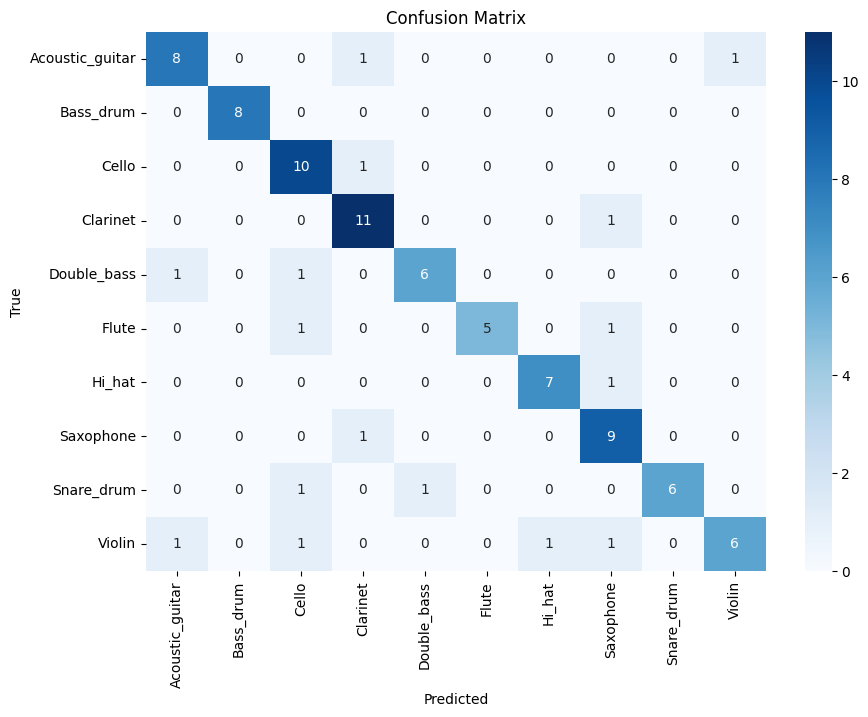

In [ ]:
import numpy as np
import os
import librosa
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.mixture import GaussianMixture

# Configuration
NUM_INSTRUMENTS = 10
NUM_GAUSSIANS = 5
NUM_COMPONENTS = 3  # Number of states in HMM (if using HMM)
MFCC_FEATURES = 13
AUDIO_PATH = "C:/Users/Natasha/Desktop/research_module/Musical_Instrument_Data"

class_labels = ['Acoustic_guitar', 'Bass_drum', 'Cello', 'Clarinet', 'Double_bass', 
                'Flute', 'Hi_hat', 'Saxophone', 'Snare_drum', 'Violin']

# Step 1: Feature Extraction
def extract_features(file_path):
    y, sr = librosa.load(file_path, sr=None)
    mfccs = librosa.feature.mfcc(y=y, sr=sr, n_mfcc=MFCC_FEATURES)
    return np.mean(mfccs, axis=1)

# Iterating through each instrument folder
instrument_features = []
instrument_labels = []

for idx, instrument_folder in enumerate(os.listdir(AUDIO_PATH)):
    folder_path = os.path.join(AUDIO_PATH, instrument_folder)
    if os.path.isdir(folder_path):
        for file_name in os.listdir(folder_path):
            file_path = os.path.join(folder_path, file_name)
            try:
                features = extract_features(file_path)
                instrument_features.append(features)
                instrument_labels.append(idx)
            except Exception as e:
                print(f"Error processing {file_path}: {e}")

# Step 2: Scaling Features
scaler = StandardScaler()
scaled_features = scaler.fit_transform(instrument_features)

# Step 3: Dimensionality Reduction (PCA)
pca = PCA(n_components=10)
pca_features = pca.fit_transform(scaled_features)

# Step 4: Train GMM for each instrument
models = []
for label in range(NUM_INSTRUMENTS):
    gmm = GaussianMixture(n_components=NUM_GAUSSIANS, covariance_type='diag', reg_covar=1e-6)
    label_features = [pca_features[i] for i in range(len(pca_features)) if instrument_labels[i] == label]
    gmm.fit(label_features)
    models.append(gmm)

# Step 5: Compute log-likelihoods for SVM training
log_likelihood_features = []
for features in pca_features:
    log_likelihood = [gmm.score([features]) for gmm in models]
    log_likelihood_features.append(log_likelihood)

# Step 6: Train/Test Split
X_train, X_test, y_train, y_test = train_test_split(log_likelihood_features, instrument_labels, test_size=0.3, random_state=42)

# Step 7: Train SVM Classifier
svm = SVC(kernel='linear', C=1.0)
svm.fit(X_train, y_train)

# Step 8: Evaluate Model
predictions = svm.predict(X_test)
accuracy = accuracy_score(y_test, predictions)
print(f"Accuracy: {accuracy:.2f}")
print(classification_report(y_test, predictions, target_names=class_labels))

# Step 9: Confusion Matrix
cm = confusion_matrix(y_test, predictions)

# Plot confusion matrix
plt.figure(figsize=(10, 7))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=class_labels, yticklabels=class_labels)
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix')
plt.show()
